<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Комментарий студента </a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Комментарий студента </a></span></li><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Комментарий студента </a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Использование-TF-IDF" data-toc-modified-id="Использование-TF-IDF-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Использование TF-IDF</a></span></li><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Комментарий студента </a></span></li><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Комментарий студента </a></span></li><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Комментарий студента </a></span></li><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Комментарий студента </a></span></li><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Комментарий студента </a></span></li><li><span><a href="#Использование-Мешка-слов" data-toc-modified-id="Использование-Мешка-слов-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Использование Мешка слов</a></span></li><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Комментарий студента </a></span></li><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Комментарий студента </a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Комментарий-студента-" data-toc-modified-id="Комментарий-студента--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Комментарий студента </a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Обзор данных

в данном разделе мы изучим набор данных: откроем его, получим общую информацию, проверим наличие пропусков, дубликатов.

In [1]:
# импортируем необходимые библиотеки
import re
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb

from pymystem3 import Mystem
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score

In [2]:
# прочитаем данные
df = pd.read_csv('....csv')

In [3]:
# выведем на экран первые 10 строк
df.head(10)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


In [4]:
# определим размер датасета
df.shape

(159571, 2)

In [5]:
# определим названия колонок
df.columns

Index(['text', 'toxic'], dtype='object')

In [6]:
# выведем общую информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [7]:
# определим, есть ли пропуски в данных
df.isna().sum()

text     0
toxic    0
dtype: int64

In [8]:
# посмотрим, есть ли дубликаты
df.duplicated().sum()

0

#### Вывод

В ходе предварительного обзора мы выяснили, что:

1) набор данных состоит из 159571 строки и 2 колонок: в одной из них текст, в другой оценка комментария: токсичный он или нет.

2) пропусков в данных нет, дубликатов нет.

3) в столбце text встречаются символы в верхнем регистре, это необходимо также преобразовать
 
В целом проблем в данных нет, посмтотрим более внимательно на столбец text

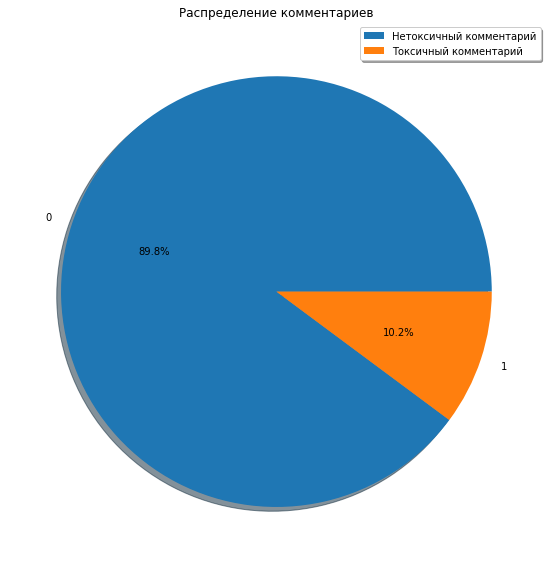

In [9]:
# построим диаграмму токсичных и нетоксичных комментариев
df['toxic'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10,8))
plt.legend(["Нетоксичный комментарий", 'Токсичный комментарий'], fontsize=10, shadow=True, facecolor='w')
plt.title('Распределение комментариев')
plt.tight_layout()
plt.axis('off')
plt.show()

In [10]:
# для проверки выведу просто количество комментариев рахных групп
df['toxic'].value_counts()

0    143346
1     16225
Name: toxic, dtype: int64

## Обучение

В данном разделе мы напишем функции для лемматизации наших текстов и очистки данных от лишних символов, используя регулярные выражения. И попробуем различные способы обучения моделей: 

1) используя Мешок слов

2) испольщуя TF-IDF

При этом будем обучать модели:

    - LogisticRegression
    - LGBM модель
    - CatBoost модель
    - DecisionTreeClassifier
    - RandomForestClassifier
    - константную модель


###   Использование TF-IDF

В данном раздеде мы преобразуем текст метод TF-IDF и попробуем обучить модели.

In [11]:
# напишем функцию лемматизации и очистки текста
sp = spacy.load('en_core_web_sm')

def lemmatize_clear_text_spacy(text):
    """
    Функция лематизации и очистки текста
    """
    text = text.lower()
    doc = sp(text)
    lemm_text = " ".join([token.lemma_ for token in doc])
    cleared_text = re.sub(r'[^a-zA-Z]', ' ', lemm_text) 
    
    return " ".join(cleared_text.split())

In [12]:
# применим функция к нашему набору данных
df['text'] = df['text'].apply(lemmatize_clear_text_spacy)

In [13]:
df.head(10)

,text,toxic
0,explanation why the edit make under my usernam...,0
1,d aww he match this background colour I be see...,0
2,hey man I be really not try to edit war it be ...,0
3,more I can not make any real suggestion on imp...,0
4,you sir be my hero any chance you remember wha...,0
5,congratulation from I as well use the tool wel...,0
6,cocksucker before you piss around on my work,1
7,your vandalism to the matt shirvington article...,0
8,sorry if the word nonsense be offensive to you...,0
9,alignment on this subject and which be contrar...,0


In [14]:
# сделаем копию набора данныхб чтобы использовать его в дальнейших формулах
df_copy = df.copy()

In [15]:
df1 = df.copy()

In [16]:
df2 = df.copy()

In [17]:
# выделим целевой признак и признаки
features = df.drop(['toxic'], axis=1)
target = df['toxic']

In [18]:
# разделим выборку 
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=12345)

In [19]:
features_train.shape, target_train.shape

((143613, 1), (143613,))

In [20]:
features_test.shape, target_test.shape

((15958, 1), (15958,))

In [21]:
# очистим от стоп-слов
nltk.download('stopwords')
stopwords = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# рассчитаем как часто одно и то же слово употребляется во всем тексте
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
features_train = count_tf_idf.fit_transform(features_train['text'])
features_test = count_tf_idf.transform(features_test['text'])

**Обучение DecisionTree Classifier**

In [23]:
# подберем параметры для DecisionTreeClassifier
tree = DecisionTreeClassifier(class_weight='balanced', random_state=12345)
params = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,15,5))}

tree_gs = GridSearchCV(tree, params, cv=3, scoring='f1', verbose=True).fit(features_train, target_train)
target_predictions = tree_gs.predict(features_test) 
tree_gs.best_score_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


0.5734887982149425

**Обучение RandomForestClassifier**

In [24]:
model = RandomForestClassifier(class_weight='balanced', random_state = 12345)
params = {'n_estimators': range(10, 120, 40), 'max_depth': range(10, 120, 40), 'max_leaf_nodes': range(10, 60, 30)}
random_forest_gs = GridSearchCV(model, params, cv=3, scoring='f1', verbose=True).fit(features_train, target_train)
target_predictions = random_forest_gs.predict(features_test) 
random_forest_gs.best_score_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


0.42856655263826493

**Обучение LogisticRegression**

In [25]:
# подберем параметры для LogisticClassifier
model = LogisticRegression(random_state = 12345, class_weight='balanced')
params = {'penalty': ['l1', 'l2'], 'C' : [0.5, 1.0, 5.0, 15.0], 'intercept_scaling' : range(5, 100, 40),'solver':['liblinear']}

logistic_regression_gs = GridSearchCV(model, params, cv=3, scoring='f1', verbose=True).fit(features_train, target_train)
target_predictions = logistic_regression_gs.predict(features_test) 
logistic_regression_gs.best_score_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7648835843943536

### Использование Мешка слов

В данном разделе мы преобразуем текст методом Мешок слов и попробуем обучить модели.

In [26]:
# выделим целевой признак и признаки
features_copy = df_copy.drop(['toxic'], axis=1)
target_copy = df_copy['toxic']

In [27]:
# разделим выборку 
features_copy_train, features_copy_test, target_copy_train, target_copy_test = train_test_split(features_copy, target_copy, test_size=0.1, random_state=12345)

In [28]:
# рассчитаем как часто одно и то же слово употребляется во всем тексте
count_vect = CountVectorizer(stop_words=stopwords)
features_copy_train = count_vect.fit_transform(features_copy_train['text'])
features_copy_test = count_vect.transform(features_copy_test['text'])

**Обучение DecisionTreeClassifier**

In [29]:
# подберем параметры для DecisionTreeClassifier
tree = DecisionTreeClassifier(class_weight='balanced', random_state=12345)
params = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,15,5))}

tree_gs_copy = GridSearchCV(tree, params, cv=3, scoring='f1', verbose=True).fit(features_copy_train, target_copy_train)
target_predictions = tree_gs_copy.predict(features_copy_test) 
tree_gs_copy.best_score_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


0.5792348419170551

**Обучение RandomForestClassifier**

In [30]:
model = RandomForestClassifier(class_weight='balanced', random_state = 142)
params = {'n_estimators': range(10, 120, 40), 'max_depth': range(10, 120, 40), 'max_leaf_nodes': range(10, 60, 30)}

random_forest_gs_copy = GridSearchCV(model, params, cv=3, scoring='f1', verbose=True).fit(features_copy_train, target_copy_train)
target_predictions = random_forest_gs_copy.predict(features_copy_test) 
random_forest_gs_copy.best_score_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


0.41376171840896997

**Обучение LogisticRegression**

# подберем параметры для LogisticClassifier
model = LogisticRegression(random_state = 12345, class_weight ='balanced')
params = {'penalty': ['l1', 'l2'], 'C' : [0.5, 1.0, 5.0, 15.0], 'intercept_scaling' : range(5, 100, 40), 'solver':['liblinear']}

logistic_regression_gs_copy = GridSearchCV(model, params, cv=3, scoring='f1', verbose=True).fit(features_copy_train, target_copy_train)
target_predictions = logistic_regression_gs.predict(features_copy_test) 
logistic_regression_gs_copy.best_score_

In [31]:
# создадим таблицу models_test
models_test = pd.DataFrame([round(tree_gs.best_score_, 3),
                           round(random_forest_gs.best_score_, 3),
                           round(logistic_regression_gs.best_score_, 3),
                           round(tree_gs_copy.best_score_, 3),
                           round(random_forest_gs_copy.best_score_, 3),
                           ],
                     columns=['F1 мера'],
                      index=[
                            'DecisionTreeClissifier TF-IDF',
                            'RandomForestClassifier TF-IDF',
                            'LogisticRegression TF-IDF',
                            'DecisionTreeClissifier Мешок слов',
                            'RandomForestClassifier Мешок слов',
                            ]
                     )

In [32]:
models_test

,F1 мера
DecisionTreeClissifier TF-IDF,0.573
RandomForestClassifier TF-IDF,0.429
LogisticRegression TF-IDF,0.765
DecisionTreeClissifier Мешок слов,0.579
RandomForestClassifier Мешок слов,0.414


### Вывод

В ходе нашего эксперимента планировалось обучить пять моделей, но, к сожалению, 2 из них обучить не получилось: LGBM модельл и Catboost модель. В конце их выполнения выдавались ошибки, а модель CatBoost была на обучении более 10 часов, но результатов никаких не было. Поэтому обучили только три модели: DecisionTree, RandomForest Classifier и LogisticRegression, причем обучение этих моделей также ребовало большого времени. Возможно, это связано с большим объемом данных. 

В ходе наших эксперииментов получили: 

1) во-первых, получили неожиданные данные, так как модель RandomForestClassifier выдавала неожиданные данные: значение f1-0.02-0.03 и при обработке текста методом TF-IDF, и Мешком слов

2) модель DecisionTree обучалась очень быстро, но ее значение f1 было меньше заданного: 0.58-0.59

3) с задачей справилась модель LogisticRegression. Данная модель хоть и обучалась долго, но получила достаточно хорошие показатели f1: 0.765

## Выводы

В ходе выполненной работы мы:

1) в ходе предварительного обзора выяснили, что:

    - набор данных состоит из 159571 строки и 2 колонок: в одной из них текст, в другой оценка комментария: токсичный он или нет.
    - пропусков в данных нет, дубликатов нет.

2) на этапе подготовки данных мы написали функцию, благодаря которой:

    - привели данные к одному регистру
    - лемматизировали данные
    - по шаблону регулярных выражений избавились от ненужных данных
    
3) на этапе обучения мы:

    - преобразовали данные двумя способами: TF-IDF и Мешок слов
    - обучили некоторое модели

В результате проведенно работы можем сказать, что дла данной задачи по поиску точных комментариев подойдет модель LogisticRegression и при этом можно выбирать любой способ обработки: и TF-IDF, и Мешок слов. Данные f1 будут 0.765 и 0.756, что выше заданного условием значения.

По всем остальным моделям мы не получили нужного результата(RandomForest и DecisionTree), а некоторые модели: CatBoost и LGBM модель, мы так и не смогли обучить.Возможно, не хватило для этого мощностей.

# ДОРАБОТКА

Здесь я сразу же начну блок с выделения только 50000 строк

In [33]:
df2 = df2.sample(50000).reset_index(drop=True)

In [34]:
df2.shape

(50000, 2)

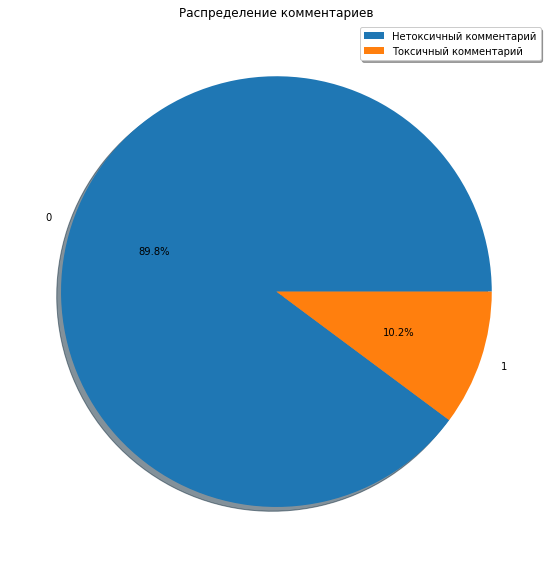

In [35]:
# проверим на дисбаланс
df2['toxic'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10,8))
plt.legend(["Нетоксичный комментарий", 'Токсичный комментарий'], fontsize=10, shadow=True, facecolor='w')
plt.title('Распределение комментариев')
plt.tight_layout()
plt.axis('off')
plt.show()

Дисбаланс так же сохраняется, поэтому учтем это при обучении моделей

In [36]:
df2.head(10)

,text,toxic
0,reference I do not like delete other people s ...,0
1,please do not vandalize page as you do with th...,0
2,list of family guy episode immblueversion I be...,0
3,thank you for experiment with wikipedia your t...,0
4,be you go to remain a complete wanker all oyur...,1
5,there be no other establish username that use ...,0
6,I disagree that it barely meet the notability ...,0
7,you do not have to read through dozen of page ...,0
8,as I have say before it be not the motive it b...,0
9,or a suitable subarticle,0


In [37]:
# выделим целевой признак и признаки
features1 = df2.drop(['toxic'], axis=1)
target1 = df2['toxic']

In [38]:
features1.shape

(50000, 1)

In [39]:
target1.shape

(50000,)

In [40]:
# разделим выборку 
features_train1, features_test1, target_train1, target_test1 = train_test_split(features1, target1, test_size=0.2, random_state=12345)

In [41]:
features_train1.shape, target_train1.shape

((40000, 1), (40000,))

In [42]:
features_test1.shape, target_test1.shape

((10000, 1), (10000,))

In [43]:
# рассчитаем как часто одно и то же слово употребляется во всем тексте
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
features_train1 = count_tf_idf.fit_transform(features_train1['text'])
features_test1 = count_tf_idf.transform(features_test1['text'])

In [44]:
features_train1.shape

(40000, 66957)

**Обучение DecisionTreeClassifier c использованием RandomizeSearchSV**

In [45]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=12345)
params = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,15,5))}

tree_gs_1 = GridSearchCV(tree, params, cv=3, scoring='f1', verbose=True).fit(features_train1, target_train1)
target_predictions = tree_gs_1.predict(features_test1) 
tree_gs_1.best_score_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


0.5610435774204635

In [46]:
tree = DecisionTreeClassifier(class_weight='balanced', random_state=12345)
params = {'max_depth':list(range(1,15,5))}

tree_gs_1 = RandomizedSearchCV(tree, params, cv=3, scoring='f1', n_iter=300).fit(features_train1, target_train1)
target_predictions = tree_gs_1.predict(features_test1) 
tree_gs_1.best_score_

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=300. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.5610435774204635

Сделала обучение с GreadSearch дланные метрики одинаковые получились. Сделала для сравнения

**Обучение RandomForestClassifier с использование RandomizeSearchCV**

In [47]:
model = RandomForestClassifier(class_weight='balanced', random_state = 12345) 
params = {'n_estimators': range(10, 120, 40), 'max_depth': range(10, 120, 40), 'max_leaf_nodes': range(10, 60, 30)} 

random_forest_gs_1 = RandomizedSearchCV(model, params, cv=3, scoring='f1', n_iter=20).fit(features_train1, target_train1)
target_predictions = random_forest_gs_1.predict(features_test1) 
random_forest_gs_1.best_score_

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.4533039330762189

**Обучение LogisticRegression с использованием RandomizedSearchCV**

In [48]:
model = LogisticRegression(random_state = 12345, class_weight ='balanced')
params = {'penalty': ['l1', 'l2'], 'C' : [0.5, 1.0, 5.0, 15.0], 'intercept_scaling' : range(5, 100, 40), 'solver':['liblinear']}

logistic_regression_gs_1 = RandomizedSearchCV(model, params, cv=3, scoring='f1', n_iter=20).fit(features_train1, target_train1)
target_predictions = logistic_regression_gs_1.predict(features_test1) 
logistic_regression_gs_1.best_score_

0.7557537812330756

In [49]:
model = LogisticRegression(random_state = 12345, class_weight='balanced')
params = {'penalty': ['l1', 'l2'], 'C' : [0.5, 1.0, 5.0, 15.0], 'intercept_scaling' : range(5, 100, 40),'solver':['liblinear']}

logistic_regression_gs = GridSearchCV(model, params, cv=3, scoring='f1', verbose=True).fit(features_train1, target_train1)
target_predictions = logistic_regression_gs.predict(features_test1) 
logistic_regression_gs.best_score_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


0.7557537812330756

**Обучение LGBMClassifier**

In [50]:
model = lgb.LGBMClassifier(class_weight ='balanced', random_state=12345)
params = {
    'n_estimators': [10, 20, 100],
    'max_depth': [5, 30],
    'num_leaves': [10, 20, 31],
    'learning_rate':[0.2]
}

lgbm_gs_1 = RandomizedSearchCV(model, params, cv=3, scoring='f1', n_iter=20).fit(features_train1, target_train1)
target_predictions = lgbm_gs_1.predict(features_test1) 
lgbm_gs_1.best_score_

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7304923740827441

In [51]:
models_test_1 = pd.DataFrame([round(tree_gs_1.best_score_, 3),
                           round(random_forest_gs_1.best_score_, 3),
                           round(logistic_regression_gs_1.best_score_, 3),
                           round(lgbm_gs_1.best_score_, 3)
                           ],
                     columns=['F1 мера'],
                      index=[
                            'DecisionTreeClissifier',
                            'RandomForestClassifier',
                            'LogisticRegression',
                            'LGBM Classifier'
                            ]
                     )

In [52]:
models_test_1 

,F1 мера
DecisionTreeClissifier,0.561
RandomForestClassifier,0.453
LogisticRegression,0.756
LGBM Classifier,0.730


В целом даже на усеченных данных получились неплохие метрики. Получилось обучить LGBM Classifier, но метрика у него ниже, чем нужно. Плюс помотрела как работает RandomizedSearch и сравнила в некотрых местах с работой GreadSearch, получили однаковые данные, но по ощущениям RandomizesSearch работает быстрее


КАк мне показалось, я все ошибки исправила:

1) убрала эникод, 

2) учла дисбаланс классов

3) для лемматизации использовала SpaCy

4) поработала с RandomizesSearch

5) поработала с усеченными данными и обучила в том числе LGBMClassifier.

Модели обучили с учетом всех недочетов, попробовали RandomizesSearch. Но на меньших объемах данных метрики получились хуже.